In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request
from nsga2.problem import Problem
from nsga2.evolution import Evolution
import math

%matplotlib inline

ImportError: No module named request

## zad 1

In [61]:
def pbil(F, d=10, N=20, θ1=0.1, θ2=0.05, θ3=0.1, T=50):
    def binary_random(p):
        return 1 if np.random.rand(1)[0] < p else 0
    
    def initial_prop_vector():
        p = np.array(np.empty(d))
        p[:] = 0.5
        return p
    
    def random_individual(p):
        return [binary_random(pk) for pk in p]
        
    def random_population(p):
        return [random_individual(p) for _ in range(N)]
        
    p = initial_prop_vector()
    P = random_population(p)
    hist = []
    for k in range(T):
        cost, best = max([(F(i), i) for i in P], key=lambda x: x[0])
        hist.append(cost)
        p = [pk * (1.0 - θ1) + xik * θ1 for pk, xik in zip(p, best)]
        
        for k in range(d):
            if np.random.rand(1)[0] < θ2:
                p[k] = p[k] * (1 - θ3) + np.random.choice([0, 1]) * θ3
                
        if k % 20 == 0:
            print("Iteration %04d : best score = %0.8f" % (k, cost))

        P = random_population(p)
    return best, hist

In [50]:
def umda(F, d=10, N=20, T=50, M=None):
    def binary_random(p):
        return 1 if np.random.rand(1)[0] < p else 0
    
    def initial_prop_vector():
        p = np.array(np.empty(d))
        p[:] = 0.5
        return p
    
    def random_individual(p):
        return [binary_random(pk) for pk in p]
        
    def random_population(p):
        return [random_individual(p) for _ in range(N)]
    
    def estimate_model(P):
        return [(sum([j[i] for j in P])) / M for i in range(d)]
    
    def evaluate_population(P, num):
        calc = [(F(i), i) for i in P]
        calc.sort(key=lambda x: x[0], reverse=True)
        return [x[1] for x in calc][:num]
    
    M = N // 2 if not M else M

    p = initial_prop_vector()
    P = random_population(p)
    hist = []
    P = evaluate_population(P, N)
    
    for k in range(T):
        Ps = P[:M]
        p = estimate_model(Ps)
        P = random_population(p)
        P = evaluate_population(P, N)
        hist.append(F(P[0]))
        if k % 20 == 0:
            print("Iteration %04d : best score = %0.8f" % (k, F(P[0])))

    return P[0], hist

In [84]:
def cga(F, d=10, N=20, θ=None, T=50):
    def binary_random(p):
        return 1 if np.random.rand(1)[0] < p else 0
    
    def initial_prop_vector():
        p = np.array(np.empty(d))
        p[:] = 0.5
        return p
    
    def random_individual(p):
        return [binary_random(pk) for pk in p]
        
    def random_population(p):
        return [random_individual(p) for _ in range(N)]
    θ = 1 / N if not θ else θ
    p = initial_prop_vector()
    x1 = random_individual(p)
    x2 = random_individual(p)
    f1 = F(x1)
    f2 = F(x2)
    
    hist = []
    for k in range(T):
        xi, xj = (x1, x2) if f1 > f2 else (x2, x1)

        for k in range(d):
            if xi[k] == 1 and xj[k] == 0:
                p[k] = p[k] + θ
            if xi[k] == 0 and xj[k] == 1:
                p[k] = p[k] - θ

        hist.append(f1)
        x1 = random_individual(p)
        x2 = random_individual(p)
        
        if k % 20 == 0:
            print("Iteration %04d : best score = %0.8f" % (k, f1))

        f1 = F(x1)
        f2 = F(x2)

    return x1, hist

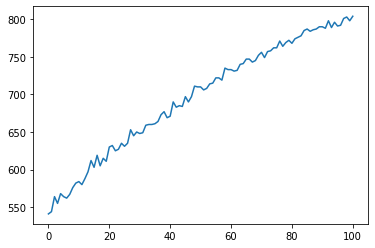

804


In [101]:
best, hist = pbil(F=sum, N=220, d=1000, T=101)
plt.figure()
plt.plot(hist)
plt.show()
print(hist[-1])

Iteration 0000 : best score = 562.00000000
Iteration 0020 : best score = 799.00000000
Iteration 0040 : best score = 952.00000000
Iteration 0060 : best score = 1000.00000000
Iteration 0080 : best score = 1000.00000000
Iteration 0100 : best score = 1000.00000000


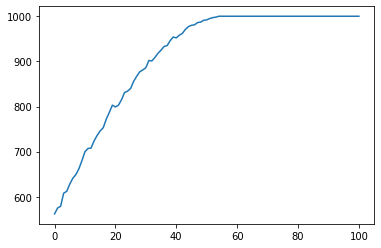

1000


In [100]:
best, hist = umda(F=sum, N=220, M=100, d=1000, T=101) #oneMax
plt.figure()
plt.plot(hist)
plt.show()
print(hist[-1])

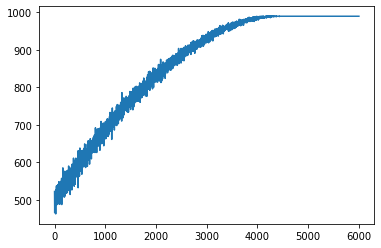

990


In [99]:
best, hist = cga(F=sum, N=90, d=1000, T=6000)
plt.figure()
plt.plot(hist)
plt.show()
print(hist[-1])

In [6]:
def dec_oneMax(v):
    s = sum(v)
    return s if s != 0 else len(v) + 1

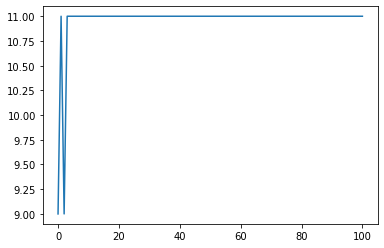

11


In [135]:
best, hist = pbil(F=dec_oneMax, N=500, d=10, T=101)
plt.figure()
plt.plot(hist)
plt.show()
print(hist[-1])

Iteration 0000 : best score = 11.00000000
Iteration 0020 : best score = 11.00000000
Iteration 0040 : best score = 11.00000000


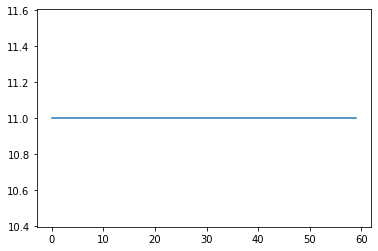

11


In [189]:
best, hist = umda(F=dec_oneMax, N=2000, M=1, d=10, T=60) #oneMax
plt.figure()
plt.plot(hist)
plt.show()
print(hist[-1])

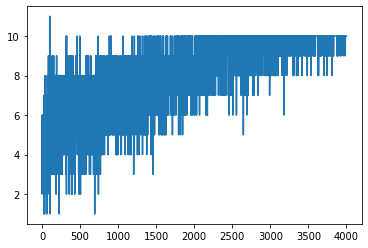

10


In [147]:
best, hist = cga(F=dec_oneMax, N=900, d=10, T=4000)
plt.figure()
plt.plot(hist)
plt.show()
print(hist[-1])

In [7]:
def kdec_oneMax(v):
    K = 5
    chunks = [v[x:x+K] for x in range(0, len(v), K)]
    return sum([dec_oneMax(x) for x in chunks])

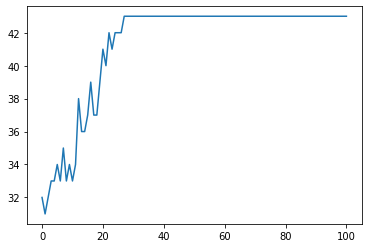

43


In [151]:
best, hist = pbil(F=kdec_oneMax, N=400, d=40, T=101)
plt.figure()
plt.plot(hist)
plt.show()
print(hist[-1])

Iteration 0000 : best score = 32.00000000
Iteration 0020 : best score = 43.00000000


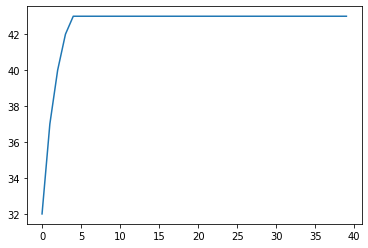

43


In [167]:
best, hist = umda(F=kdec_oneMax, N=400, M=5, d=40, T=40) #oneMax
plt.figure()
plt.plot(hist)
plt.show()
print(hist[-1])

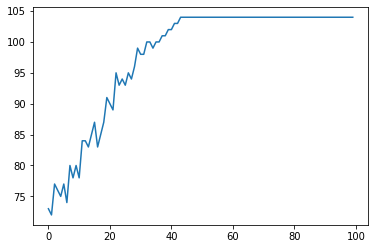

104


In [180]:
best, hist = pbil(F=kdec_oneMax, N=2000, d=100, T=100)
plt.figure()
plt.plot(hist)
plt.show()
print(hist[-1])

Iteration 0000 : best score = 74.00000000
Iteration 0020 : best score = 103.00000000


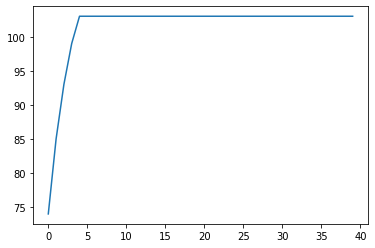

103


In [179]:
best, hist = umda(F=kdec_oneMax, N=2000, M=5, d=100, T=40) #oneMax
plt.figure()
plt.plot(hist)
plt.show()
print(hist[-1])

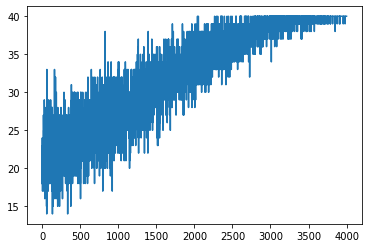

40


In [173]:
best, hist = cga(F=kdec_oneMax, N=400, d=40, T=4000)
plt.figure()
plt.plot(hist)
plt.show()
print(hist[-1])

## zad 2

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import stats
from sklearn.metrics import mutual_info_score

np.set_printoptions(precision=4)


class Mimic(object):
    def __init__(self, domain, fitness_function, samples=1000, percentile=0.50):

        self.domain = domain
        self.samples = samples
        initial_samples = np.array(self._generate_initial_samples())
        self.sample_set = SampleSet(initial_samples, fitness_function)
        self.fitness_function = fitness_function
        self.percentile = percentile

    def fit(self):

        samples = self.sample_set.get_percentile(self.percentile)
        self.distribution = Distribution(samples)
        self.sample_set = SampleSet(
            self.distribution.generate_samples(self.samples),
            self.fitness_function,
        )
        return self.sample_set.get_percentile(self.percentile)

    def _generate_initial_samples(self):
        return [self._generate_initial_sample() for i in xrange(self.samples)]

    def _generate_initial_sample(self):
        return [random.randint(self.domain[i][0], self.domain[i][1])
                for i in xrange(len(self.domain))]


class SampleSet(object):
    def __init__(self, samples, fitness_function, maximize=True):
        self.samples = samples
        self.fitness_function = fitness_function
        self.maximize = maximize

    def calculate_fitness(self):
        sorted_samples = sorted(
            self.samples,
            key=self.fitness_function,
            reverse=self.maximize,
        )
        return np.array(sorted_samples)

    def get_percentile(self, percentile):
        fit_samples = self.calculate_fitness()
        index = int(len(fit_samples) * percentile)
        return fit_samples[:index]


class Distribution(object):
    def __init__(self, samples):
        self.samples = samples
        self.complete_graph = self._generate_mutual_information_graph()
        self.spanning_graph = self._generate_spanning_graph()
        self._generate_bayes_net()

    def generate_samples(self, number_to_generate):
        root = 0
        sample_len = len(self.bayes_net.node)
        samples = np.zeros((number_to_generate, sample_len))
        values = self.bayes_net.node[root]["probabilities"].keys()
        probabilities = self.bayes_net.node[root]["probabilities"].values()
        dist = stats.rv_discrete(name="dist", values=(values, probabilities))
        samples[:, 0] = dist.rvs(size=number_to_generate)
        for parent, current in nx.bfs_edges(self.bayes_net, root):
            for i in xrange(number_to_generate):
                parent_val = samples[i, parent]
                current_node = self.bayes_net.node[current]
                cond_dist = current_node["probabilities"][int(parent_val)]
                values = cond_dist.keys()
                probabilities = cond_dist.values()
                dist = stats.rv_discrete(
                    name="dist",
                    values=(values, probabilities)
                )
                samples[i, current] = dist.rvs()

        return samples

    def _generate_bayes_net(self):
        root = 0

        samples = np.asarray(self.samples)
        self.bayes_net = nx.bfs_tree(self.spanning_graph, root)

        for parent, child in self.bayes_net.edges():
            parent_array = samples[:, parent]
            if not self.bayes_net.predecessors(parent):
                freqs = np.histogram(parent_array,len(np.unique(parent_array)))[0]
                parent_probs = dict(zip(np.unique(parent_array),freqs/(sum(freqs)*1.0)))
                
                self.bayes_net.node[parent]["probabilities"] = {x:0 for x in range(len(self.samples))}
                self.bayes_net.node[parent]["probabilities"].update(parent_probs)

                
            child_array = samples[:, child]

            unique_parents = np.unique(parent_array)
            for parent_val in unique_parents:
                parent_inds = np.argwhere(parent_array == parent_val)
                sub_child = child_array[parent_inds]
                
                freqs = np.histogram(sub_child,len(np.unique(sub_child)))[0]
                child_probs = dict(zip(np.unique(sub_child),freqs/(sum(freqs)*1.0)))
                
                self.bayes_net.node[child][parent_val] = {x:0 for x in range(len(self.samples))}
                self.bayes_net.node[child][parent_val].update(child_probs)
                
            self.bayes_net.node[child] = dict(probabilities=self.bayes_net.node[child])

    def _generate_spanning_graph(self):
        return nx.algorithms.mst.prim_mst(self.complete_graph)

    def _generate_mutual_information_graph(self):
        samples = np.asarray(self.samples)
        complete_graph = nx.complete_graph(samples.shape[1])

        for edge in complete_graph.edges():
            mutual_info = mutual_info_score(
                samples[:, edge[0]],
                samples[:, edge[1]]
            )

            complete_graph[edge[0]][edge[1]]['weight'] = -mutual_info

        return complete_graph

In [4]:
def mimic(F, N, d, T, M):
    hist = []
    m = Mimic([(0, 1)] * d, F, samples=N, percentile=M)
    for i in range(T):
        score = [F(sample) for sample in m.fit()][0]
        hist.append(score)
        print("Iteration %04d : best score = %0.8f" % (i, score))
        m.fit()
    results = m.fit()
    return results[:0], hist

Iteration 0000 : best score = 68.00000000
Iteration 0001 : best score = 70.00000000
Iteration 0002 : best score = 77.00000000
Iteration 0003 : best score = 84.00000000
Iteration 0004 : best score = 88.00000000
Iteration 0005 : best score = 93.00000000
Iteration 0006 : best score = 95.00000000
Iteration 0007 : best score = 99.00000000
Iteration 0008 : best score = 100.00000000
Iteration 0009 : best score = 100.00000000
Iteration 0010 : best score = 100.00000000
Iteration 0011 : best score = 100.00000000
Iteration 0012 : best score = 100.00000000
Iteration 0013 : best score = 100.00000000
Iteration 0014 : best score = 100.00000000
Iteration 0015 : best score = 100.00000000
Iteration 0016 : best score = 100.00000000
Iteration 0017 : best score = 100.00000000
Iteration 0018 : best score = 100.00000000
Iteration 0019 : best score = 100.00000000


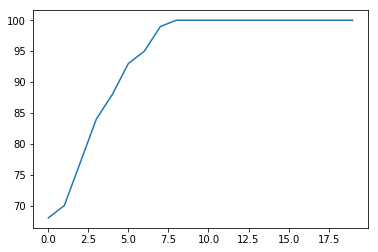

100.0


In [36]:
best, hist = mimic(F=sum, N=140, d=100, T=20)
plt.figure()
plt.plot(hist)
plt.show()
print(hist[-1])

Iteration 0000 : best score = 556.00000000
Iteration 0001 : best score = 584.00000000
Iteration 0002 : best score = 612.00000000
Iteration 0003 : best score = 640.00000000
Iteration 0004 : best score = 667.00000000
Iteration 0005 : best score = 691.00000000
Iteration 0006 : best score = 713.00000000
Iteration 0007 : best score = 731.00000000
Iteration 0008 : best score = 752.00000000
Iteration 0009 : best score = 773.00000000
Iteration 0010 : best score = 801.00000000
Iteration 0011 : best score = 814.00000000
Iteration 0012 : best score = 839.00000000
Iteration 0013 : best score = 846.00000000
Iteration 0014 : best score = 858.00000000
Iteration 0015 : best score = 875.00000000
Iteration 0016 : best score = 894.00000000
Iteration 0017 : best score = 904.00000000
Iteration 0018 : best score = 920.00000000
Iteration 0019 : best score = 930.00000000
Iteration 0020 : best score = 934.00000000
Iteration 0021 : best score = 942.00000000
Iteration 0022 : best score = 951.00000000
Iteration 0

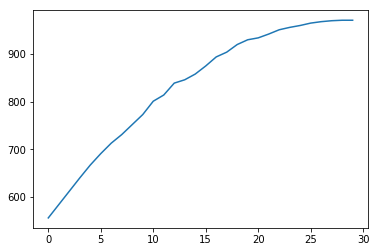

971.0


In [57]:
best, hist = mimic(F=sum, N=300, d=1000, T=30, M=0.45)
plt.figure()
plt.plot(hist)
plt.show()
print(hist[-1])

Iteration 0000 : best score = 11.00000000
Iteration 0001 : best score = 11.00000000
Iteration 0002 : best score = 11.00000000
Iteration 0003 : best score = 11.00000000
Iteration 0004 : best score = 11.00000000
Iteration 0005 : best score = 11.00000000
Iteration 0006 : best score = 11.00000000
Iteration 0007 : best score = 11.00000000
Iteration 0008 : best score = 11.00000000
Iteration 0009 : best score = 11.00000000


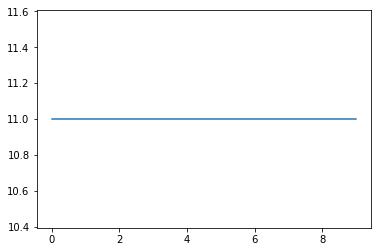

In [54]:
best, hist = mimic(F=dec_oneMax, N=1000, d=10, T=10, M=0.001)
plt.figure()
plt.plot(hist)
plt.show()

Iteration 0000 : best score = 36.00000000
Iteration 0001 : best score = 45.00000000
Iteration 0002 : best score = 47.00000000
Iteration 0003 : best score = 47.00000000
Iteration 0004 : best score = 47.00000000
Iteration 0005 : best score = 47.00000000
Iteration 0006 : best score = 47.00000000
Iteration 0007 : best score = 47.00000000
Iteration 0008 : best score = 47.00000000
Iteration 0009 : best score = 47.00000000


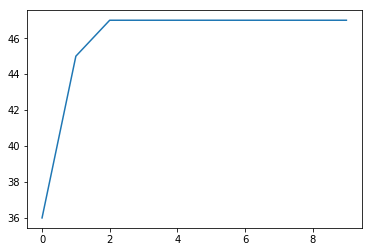

In [62]:
best, hist = mimic(F=kdec_oneMax, N=1000, d=40, T=10, M=0.05)
plt.figure()
plt.plot(hist)
plt.show()

Iteration 0000 : best score = 77.00000000
Iteration 0001 : best score = 92.00000000
Iteration 0002 : best score = 101.00000000
Iteration 0003 : best score = 104.00000000
Iteration 0004 : best score = 104.00000000
Iteration 0005 : best score = 104.00000000
Iteration 0006 : best score = 104.00000000
Iteration 0007 : best score = 104.00000000
Iteration 0008 : best score = 104.00000000
Iteration 0009 : best score = 104.00000000


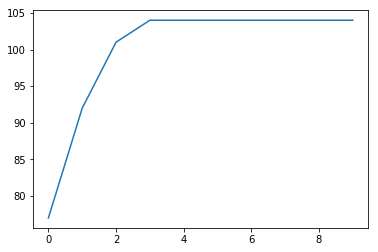

In [7]:
best, hist = mimic(F=kdec_oneMax, N=4000, d=100, T=10, M=0.02)
plt.figure()
plt.plot(hist)
plt.show()

Iteration 0000 : best score = 76.00000000
Iteration 0001 : best score = 84.00000000
Iteration 0002 : best score = 97.00000000
Iteration 0003 : best score = 101.00000000
Iteration 0004 : best score = 103.00000000
Iteration 0005 : best score = 104.00000000
Iteration 0006 : best score = 104.00000000
Iteration 0007 : best score = 104.00000000
Iteration 0008 : best score = 104.00000000
Iteration 0009 : best score = 104.00000000


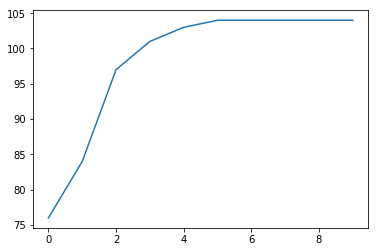

In [8]:
best, hist = mimic(F=kdec_oneMax, N=4000, d=100, T=10, M=0.1)
plt.figure()
plt.plot(hist)
plt.show()

Iteration 0000 : best score = 79.00000000
Iteration 0001 : best score = 91.00000000
Iteration 0002 : best score = 102.00000000
Iteration 0003 : best score = 104.00000000
Iteration 0004 : best score = 104.00000000
Iteration 0005 : best score = 104.00000000
Iteration 0006 : best score = 104.00000000
Iteration 0007 : best score = 104.00000000
Iteration 0008 : best score = 104.00000000
Iteration 0009 : best score = 104.00000000


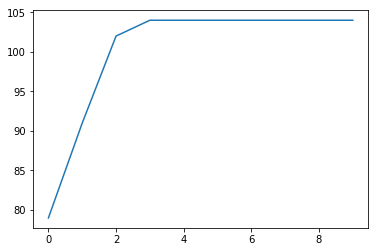

In [12]:
best, hist = mimic(F=kdec_oneMax, N=4000, d=100, T=10, M=0.02)
plt.figure()
plt.plot(hist)
plt.show()

Iteration 0000 : best score = 83.00000000
Iteration 0001 : best score = 90.00000000
Iteration 0002 : best score = 102.00000000
Iteration 0003 : best score = 108.00000000
Iteration 0004 : best score = 108.00000000
Iteration 0005 : best score = 108.00000000
Iteration 0006 : best score = 108.00000000
Iteration 0007 : best score = 108.00000000
Iteration 0008 : best score = 108.00000000
Iteration 0009 : best score = 108.00000000


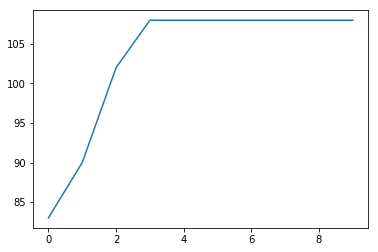

In [8]:
best, hist = mimic(F=kdec_oneMax, N=6000, d=100, T=10, M=0.02)
plt.figure()
plt.plot(hist)
plt.show()

Iteration 0000 : best score = 82.00000000
Iteration 0001 : best score = 94.00000000
Iteration 0002 : best score = 105.00000000
Iteration 0003 : best score = 109.00000000
Iteration 0004 : best score = 110.00000000


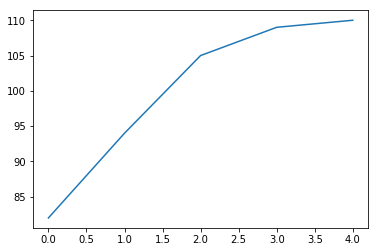

In [9]:
best, hist = mimic(F=kdec_oneMax, N=10000, d=100, T=5, M=0.02)
plt.figure()
plt.plot(hist)
plt.show()

## zad 3

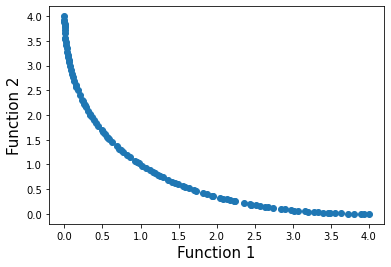

In [4]:
#SCH
statistics = {}
def f1(x):
    return x**2

def f2(x):
    return (x-2)**2

problem = Problem(num_of_variables=1, objectives=[f1, f2], variables_range=[(-55, 55)])
evo = Evolution(problem)
evol = evo.evolve()
func = [i.objectives for i in evol]

function1 = [i[0] for i in func]
function2 = [i[1] for i in func]
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(function1, function2)
plt.show()

### optimum:

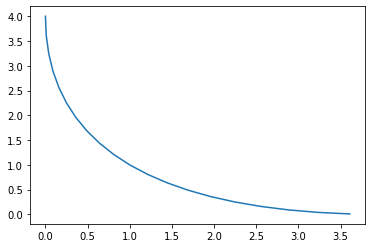

In [6]:
F = np.array([f1(x) for x in np.arange(0., 2., 0.1)])
Y = np.array([f2(x) for x in np.arange(0., 2., 0.1)])
plt.plot(F, Y)

### prev iterations:

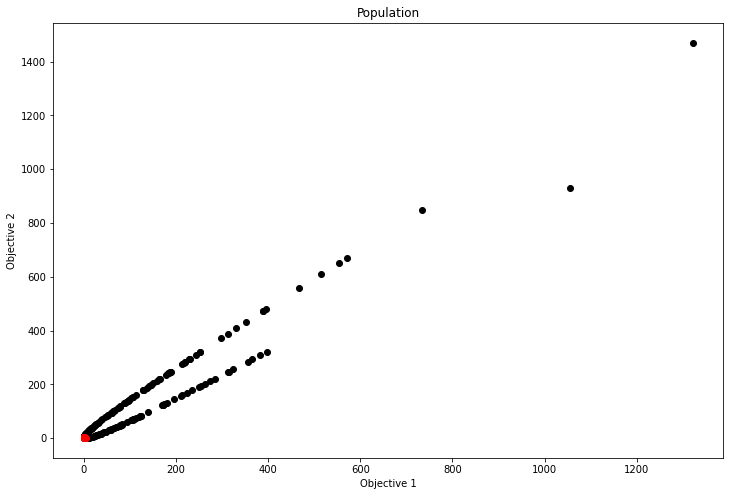

In [31]:
population = evo.on_generation_finished[1]

ranks = np.array([individual.rank for individual in population])
objectives = np.array([individual.objectives for individual in population])

PF0 = (ranks == 0)
PF1 = (ranks == 1)
PF2 = (ranks == 2)

plt.figure(figsize=(12, 8))
plt.plot(objectives[:, 0], objectives[:, 1], 'ko')
plt.plot(objectives[PF2, 0], objectives[PF2, 1], 'bo')
plt.plot(objectives[PF1, 0], objectives[PF1, 1], 'go')
plt.plot(objectives[PF0, 0], objectives[PF0, 1], 'ro')
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('Population')
plt.show()

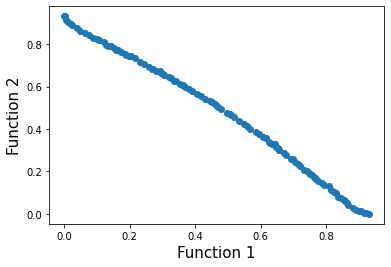

In [32]:
#FON
def f1(x):
    s = 0
    for i in range(len(x)-1):
        s += (x[i] - (1.0 / math.sqrt(3))) ** 2
    return 1 - math.exp(-s)

def f2(x):
    s = 0
    for i in range(len(x)-1):
        s += (x[i] + (1.0 / math.sqrt(3))) ** 2
    return 1 - math.exp(-s)

problem = Problem(num_of_variables=3, objectives=[f1, f2], variables_range=[(-4, 4)], same_range=True, expand=False)
evo = Evolution(problem)
evol = evo.evolve()
func = [i.objectives for i in evol]

function1 = [i[0] for i in func]
function2 = [i[1] for i in func]
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(function1, function2)
plt.show()

## optimal

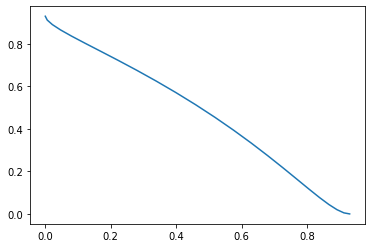

In [33]:
F = np.arange(-1. / np.sqrt(3), 1. / np.sqrt(3), 0.05)
X = np.array([f1([x, x, x]) for x in F])
Y = np.array([f2([x, x, x]) for x in F])
plt.plot(X, Y)

#### prev generation

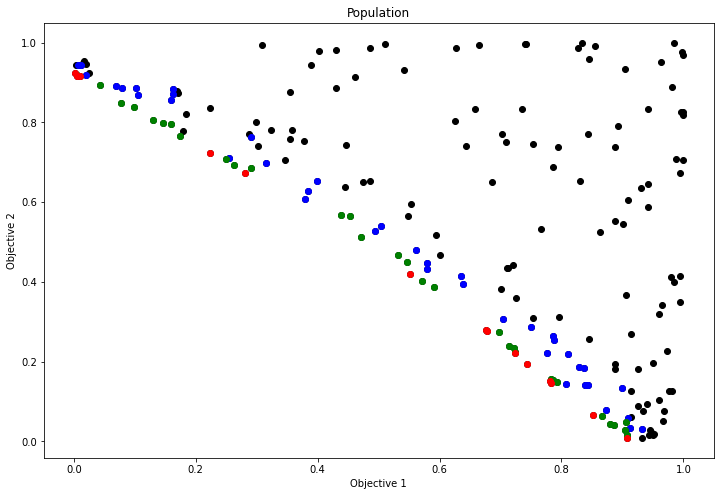

In [37]:
population = evo.on_generation_finished[5]

ranks = np.array([individual.rank for individual in population])
objectives = np.array([individual.objectives for individual in population])

PF0 = (ranks == 0)
PF1 = (ranks == 1)
PF2 = (ranks == 2)

plt.figure(figsize=(12, 8))
plt.plot(objectives[:, 0], objectives[:, 1], 'ko')
plt.plot(objectives[PF2, 0], objectives[PF2, 1], 'bo')
plt.plot(objectives[PF1, 0], objectives[PF1, 1], 'go')
plt.plot(objectives[PF0, 0], objectives[PF0, 1], 'ro')
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('Population')
plt.show()

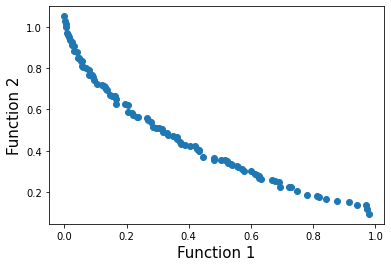

In [41]:
#ZDT1
def f1(x):
    return x[0]

def g(x):
    return 1 + 9 * (np.sum(x[1:])) / (len(x) - 1)

def f2(x):
    return g(x) * (1 - np.sqrt(x[0] / g(x)))

problem = Problem(num_of_variables=30, objectives=[f1, f2], variables_range=[(0, 1)], same_range=True, expand=False)
evo = Evolution(problem, mutation_param=20)
func = [i.objectives for i in evo.evolve()]

function1 = [i[0] for i in func]
function2 = [i[1] for i in func]
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(function1, function2)
plt.show()

### optimal solution

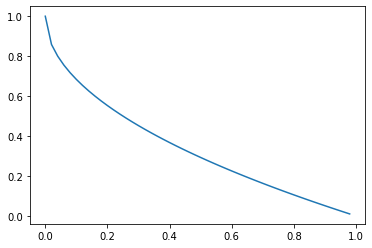

In [43]:
F = np.arange(0, 1, 0.02)
vec = [0 for _ in range(29)]
X = np.array([f1([x] + vec) for x in F])
Y = np.array([f2([x] + vec) for x in F])
plt.plot(X, Y)

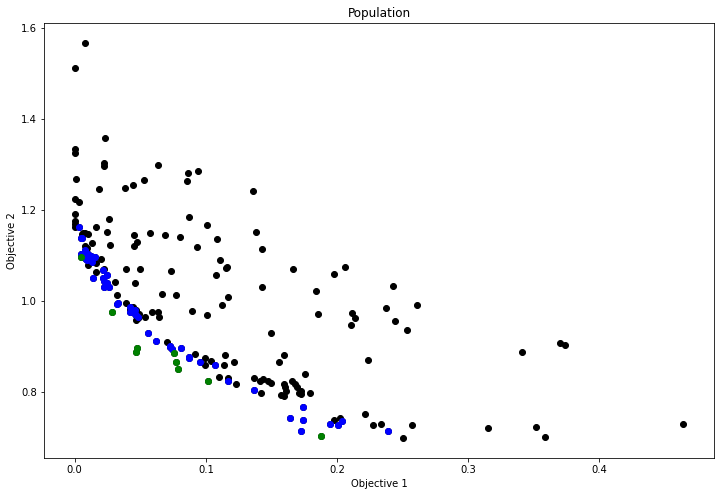

In [48]:
population = evo.on_generation_finished[25]

ranks = np.array([individual.rank for individual in population])
objectives = np.array([individual.objectives for individual in population])

PF0 = (ranks == 0)
PF1 = (ranks == 1)
PF2 = (ranks == 2)

plt.figure(figsize=(12, 8))
plt.plot(objectives[:, 0], objectives[:, 1], 'ko')
plt.plot(objectives[PF2, 0], objectives[PF2, 1], 'bo')
plt.plot(objectives[PF1, 0], objectives[PF1, 1], 'go')
plt.plot(objectives[PF0, 0], objectives[PF0, 1], 'ro')
plt.xlabel('Objective 1')
plt.ylabel('Objective 2')
plt.title('Population')
plt.show()